In [ ]:
!pip uninstall transformers                       # installing libraries (TRANSFORMERS for BERT)
!pip install --upgrade transformers==4.28.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.6 MB/s eta 0:00:00


In [ ]:

!pip install numpy==1.19.5
!pip install torch==1.7.1
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 34.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement torch==1.7.1 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution

In [ ]:
#The datasets library is a Python package that provides an efficient way to work with various datasets, including text and image datasets. It provides a standardized interface for loading and processing datasets, making it easier to work with different datasets and models.

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd 
from transformers import BertTokenizer, Trainer, BertForSequenceClassification, TrainingArguments
from datasets import Dataset
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# tested in transformers==4.18.0, pytorch==1.7.1 
import torch
import transformers
torch.__version__, transformers.__version__

('2.0.1+cu118', '4.28.0')

*Note: the following code is for demonstration purpose. Please use GPU for fast inference on large scale dataset.*

In [ ]:
torch.cuda.is_available()      # Check if a CUDA-capable GPU is available

True

### load dataset

In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
df = df[~df.Sentiment.str.contains('\|')]  # Filtering the DataFrame 'df' to remove rows where the 'category' column contains '|'
df = df[df.Sentiment != 'nocode']   ## Filtering the DataFrame 'df' to remove rows where the 'category' column equals 'nocode'

#get value count for each class
df.Sentiment.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [ ]:
#get unique values    # JUST TO CHECK UNIQUE LABELS IN DATASET
possible_labels = df.Sentiment.unique()  ## Creating an array 'possible_labels' that contains all unique values in the 'category' column of the DataFrame 'df
possible_labels

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
label_dict = {}      # Creating an empty dictionary 'label_dict' to store the label-index pairs
for index, possible_label in enumerate(possible_labels):       # Iterating over each label in 'possible_labels'
    label_dict[possible_label] = index   # Adding the label-index pair to the 'label_dict' dictionary

In [ ]:
df['label'] = df.Sentiment.replace(label_dict)  # Creating a new column 'label' in the DataFrame 'df' by replacing the categorical values in the 'category' column with their corresponding index values from the 'label_dict' dictionary

In [ ]:
df      # labels for neutral is 0 , for negative is 1 , for positive is 2

,Sentence,Sentiment,label
0,The GeoSolutions technology will leverage Bene...,positive,0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,1
2,"For the last quarter of 2010 , Componenta 's n...",positive,0
3,According to the Finnish-Russian Chamber of Co...,neutral,2
4,The Swedish buyout firm has sold its remaining...,neutral,2
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,1
5838,Nordic Walking was first used as a summer trai...,neutral,2
5839,"According shipping company Viking Line , the E...",neutral,2
5840,"In the building and home improvement trade , s...",neutral,2


In [ ]:
import nltk    
nltk.download('punkt')              #This line downloads the "punkt" dataset from the Natural Language Toolkit (nltk) library. This dataset contains pre-trained tokenizers for various languages. Once downloaded, these tokenizers can be used to tokenize text into words, sentences, etc.
nltk.download('stopwords')  # Downloading the 'stopwords' corpus
nltk.download('wordnet')   #This line downloads the WordNet corpus from the Natural Language Toolkit (NLTK) library, which is a lexical database that organizes words into groups based on their meanings and relationships with other words in the English language.
from nltk.corpus import stopwords # Importing the 'stopwords' corpus from nltk

stop_words = stopwords.words('english')               # Creating a variable 'stop_words' containing the default English stopwords
stop_words=set(stop_words).union(set([',','.','-','/','@','#','(',')']))# Adding additional stopwords to the 'stop_words' set
df['Sentence'] = df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))   #Applying a lambda function to the 'sentence' column of the DataFrame 'df' to remove stopwords from each sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = df.dropna(subset=['Sentence', 'label']) ## drop missing values

In [ ]:
from nltk.stem import WordNetLemmatizer   #This code uses the WordNetLemmatizer from the NLTK package to lemmatize words in each sentence in the 'sentence' column of the dataframe 'df'.
# Lemmatization is the process of reducing a word to its base or dictionary form, which helps in reducing the number of unique words in the text data, 
#thereby reducing the dimensionality of the problem.
# The lemmatization is performed on each word in the sentence by first tokenizing the sentence using the nltk.word_tokenize function and 
#then applying lemmatization on each token using the lemmatize function from the WordNetLemmatizer. 
#The result of lemmatization is then joined back into a sentence using the join function.
lemmatizer = WordNetLemmatizer()
df['Sentence']=df['Sentence'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

### prepare training/validation/testing


Splitting the dataset into training, testing and validation sets using the train_test_split function from the scikit-learn library
The 'stratify' parameter ensures that the proportion of target labels in each split is the same as that in the original dataset
The 'test_size' parameter specifies the percentage of data to be allocated to the testing set
The 'random_state' parameter ensures that the same splits are obtained every time the code is run

In [ ]:

#These lines split the dataset df into training, validation, and testing sets using train_test_split() function from the sklearn library.
# The stratify parameter is used to ensure that the proportion of the target classes is the same in the training, validation, and testing sets.
# The split ratio is 90% for training and 10% for testing and validation each. 
#The shape of the resulting df_train, df_test, and df_val dataframes is printed to check that the split has been performed correctly.

In [ ]:
df_train, df_test, = train_test_split(df, stratify=df['label'], test_size=0.1, random_state=42)
df_train, df_val = train_test_split(df_train, stratify=df_train['label'],test_size=0.1, random_state=42)
print(df_train.shape, df_test.shape, df_val.shape)

(4731, 3) (585, 3) (526, 3)


### load BERT pretrained model


In [ ]:
#Here we initializes a BERT model for sequence classification and a corresponding tokenizer.

#BertForSequenceClassification is a pre-trained BERT model from the Hugging Face Transformers library that is fine-tuned for sequence classification tasks. In this case it is initialized with the pre-trained weights of the bert-base-uncased model and the number of labels set to 3. The bert-base-uncased model is a smaller version of the BERT model architecture that has been trained on uncased English text.

#The BertTokenizer is used to preprocess input text so that it can be fed into the BertForSequenceClassification model. It converts the input text into a format that the model can understand, which involves tokenizing the text into individual subwords and encoding them as numerical values.

#Overall, this code initializes a BERT model and tokenizer for sequence classification tasks and sets up the pre-trained weights and settings needed to perform inference on new data.

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

FREEZING LAYERS

In [ ]:
for param in model.bert.encoder.layer[:6].parameters():
    # print(param)
    param.requires_grad = False

### prepare dataset for fine-tuning

In [ ]:
#This block of code creates 'Dataset' objects from the training, validation, and test sets, which are originally stored in pandas DataFrames
#Each DataFrame is converted to a 'Dataset' using the 'from_pandas' method of the 'Dataset' class
#Then, each 'Dataset' is tokenized using the 'tokenizer' object, with padding and truncation applied to ensure that each input has a fixed length of 128
#Finally, the 'set_format' method is called on each 'Dataset' to specify the format and columns to be used when the data is fed into the model

In [ ]:
dataset_train = Dataset.from_pandas(df_train) ## Creating a 'Dataset' object from the training set DataFrame 'df_train'
dataset_val = Dataset.from_pandas(df_val)  ## Creating a 'Dataset' object from the validation set DataFrame 'df_val'
dataset_test = Dataset.from_pandas(df_test)  # # Creating a 'Dataset' object from the test set DataFrame 'df_test'


#Tokenizing each 'Dataset' using the 'tokenizer' object with padding and truncation applied
dataset_train = dataset_train.map(lambda e: tokenizer(e['Sentence'], truncation=True, padding='max_length', max_length=128), batched=True)
dataset_val = dataset_val.map(lambda e: tokenizer(e['Sentence'], truncation=True, padding='max_length', max_length=128), batched=True)
dataset_test = dataset_test.map(lambda e: tokenizer(e['Sentence'], truncation=True, padding='max_length' , max_length=128), batched=True)
#Setting the format and columns of each 'Dataset' to be used when the data is fed into the model
dataset_train.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_val.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_test.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])


Map:   0%|          | 0/4731 [00:00<?, ? examples/s]

Map:   0%|          | 0/526 [00:00<?, ? examples/s]

Map:   0%|          | 0/585 [00:00<?, ? examples/s]

### define training options

In [ ]:
!pip install git+https://github.com/huggingface/accelerate
#This line of code installs the 'accelerate' package from the Hugging Face library via pip.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-yah9i4ob
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-yah9i4ob
  Resolved https://github.com/huggingface/accelerate to commit 0871e93a747fe3e95a71ad41cc77ae210ecde1d6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for accelerate: filename=accelerate-0.20.0.dev0-py3-none-any.whl size=225519 sha256=27b242a5a0db67f6d1e50b5f3cae8d02e6bf912a3dfec61e89879b45ecb4e39c
  Stored in directory: /tmp/pip-ephem-wheel-cache-n99ewdxu/wheels/f6/c7/9d/1b8a5ca8353d9307733bc719107acb67acdc95063bba749f26
Successfully built accelerate


In [ ]:
#This code defines a function compute_metrics that takes eval_pred as input and returns a dictionary containing the accuracy score computed using sklearn's accuracy_score function.

#Then, the code sets up the training arguments using TrainingArguments from the transformers library. The arguments include the output directory for storing the trained model, the evaluation strategy, the learning rate, the batch sizes, the number of training epochs, the weight decay, and other parameters.

#The Trainer object is then instantiated using the defined model, the training and evaluation datasets, the compute_metrics function, and the TrainingArguments. Finally, the train() method is called on the Trainer object to train the model.

In [ ]:
# Define a function to compute the evaluation metrics
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {'accuracy' : accuracy_score(predictions, labels)}
# Set up the training arguments

args = TrainingArguments(
        output_dir = '/content/temp/',   ## Directory to save the trained model
        evaluation_strategy = 'epoch',   ## Evaluate the model after every epoch
        save_strategy = 'epoch',   ## Save the model after every epoch
        learning_rate=2e-5,         ## Learning rate for the optimizer
        per_device_train_batch_size=64,  ## Batch size for training
        per_device_eval_batch_size=64,   ## Batch size for evaluation
        num_train_epochs=5,             # Number of training epochs
        weight_decay=0.01,              # Weight decay for regularization
        load_best_model_at_end=True,
        logging_steps=10,
        save_steps=10,      # Load the best model at the end of training
        metric_for_best_model='accuracy',   # Metric to use for determining the best model
)

trainer = Trainer(
        model=model,                          # The pre-trained model to be trained
        args=args,                  # # Training arguments
        train_dataset=dataset_train,         # training dataset
        eval_dataset=dataset_val,            # evaluation dataset
        compute_metrics=compute_metrics    # Function to compute evaluation metrics
)
# Train the model
trainer.train()   

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.757700,0.735025,0.669202
2,0.611400,0.571980,0.750951
3,0.552400,0.556196,0.730038
4,0.500500,0.539925,0.745247
5,0.480200,0.533991,0.750951


TrainOutput(global_step=370, training_loss=0.6063666111714131, metrics={'train_runtime': 455.7195, 'train_samples_per_second': 51.907, 'train_steps_per_second': 0.812, 'total_flos': 1555986974088960.0, 'train_loss': 0.6063666111714131, 'epoch': 5.0})

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score,classification_report
#This line imports the functions confusion_matrix, f1_score, and classification_report from the sklearn.metrics module, which are used to evaluate the performance of a classifier.

### evaluate on testing set

In [ ]:

#These two lines evaluate the trained model on the test dataset.
model.eval()                      #This line sets the model to evaluation mode, which turns off features like dropout and batch normalization that are used during training to prevent overfitting.

# predict method of the Trainer class to generate predictions on the test dataset, and then applies the compute_metrics function defined earlier to compute evaluation metrics. The metrics returned are printed to the console.                     
trainer.predict(dataset_test).metrics                                                                                                       
                                                                                                          
                                                                                                          
                                                                                                          
                                                                                                                    


{'test_loss': 0.5766159892082214,
 'test_accuracy': 0.7384615384615385,
 'test_runtime': 4.4598,
 'test_samples_per_second': 131.171,
 'test_steps_per_second': 2.242}

In [ ]:
pred=trainer.predict(dataset_test)             #This line generates predictions on the test dataset using the predict method of the Trainer class, and stores the predictions in the pred variable.

In [ ]:
pred_labels=pred.predictions.argmax(axis=-1)              #This line extracts the predicted labels from the pred variable by taking the argmax along the last axis of the predictions array, and stores the predicted labels in the pred_labels variable. The argmax function returns the index of the maximum value along a given axis, which corresponds to the predicted label for each input.






In [ ]:
#The code down below computes the confusion matrix for the predictions made by the model on the test dataset. It first extracts the true labels of the test dataset from the label column of the dataset_test object, and stores them in the true_labels variable.
#Then it uses the confusion_matrix function from sklearn.metrics to compute the confusion matrix of the predicted labels (pred_labels) and true labels (true_labels), and stores the result in the conf_matrix variable. The confusion matrix is a table that summarizes the number of correct and incorrect predictions made by a classifier, organized by true and predicted label.

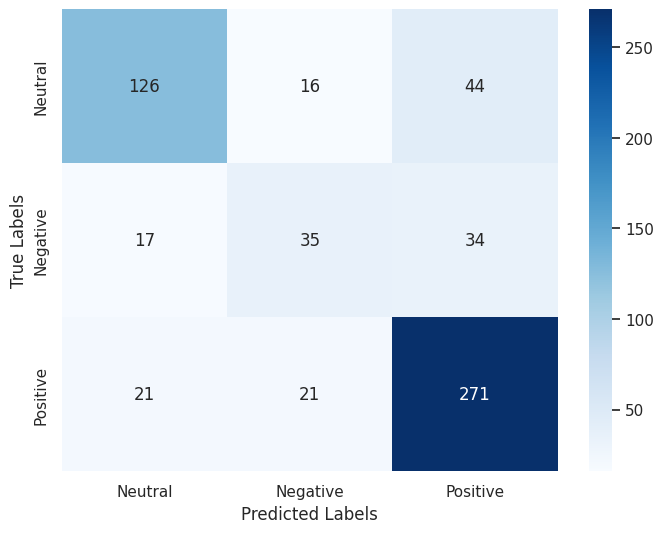

Confusion Matrix:
[[126  16  44]
 [ 17  35  34]
 [ 21  21 271]]
F1 Score: 0.6605896975027725

Classification Report:
              precision    recall  f1-score   support

     neutral       0.77      0.68      0.72       186
    negative       0.49      0.41      0.44        86
    positive       0.78      0.87      0.82       313

    accuracy                           0.74       585
   macro avg       0.68      0.65      0.66       585
weighted avg       0.73      0.74      0.73       585



In [ ]:
# Calculate the confusion matrix
true_labels = dataset_test['label']    
conf_matrix = confusion_matrix(true_labels, pred_labels)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(8, 6))
category_names = ['Neutral', 'Negative', 'Positive']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=category_names, yticklabels=category_names)
plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')
plt.show()


# Calculate the F1 score
f1 = f1_score(true_labels, pred_labels, average='macro')

# Print the results
print('Confusion Matrix:')
print(conf_matrix)
print('F1 Score:', f1)


class_report = classification_report(true_labels, pred_labels, target_names=['neutral', 'negative', 'positive'])

print('\nClassification Report:')
print(class_report)

### save the fine-tuned model.



In [ ]:
trainer.save_model('freeze_bert-sentiment')   #This line of code saves the trained model to the directory #"finbert-sentiment". This saved model can be later loaded and used for inference or further training.